In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
%%capture
! pip install seaborn

In [8]:
df_accident = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df_accident.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
df_accident.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [10]:
df_accident.drop(['X','Y','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SDOTCOLNUM','OBJECTID','INCKEY','COLDETKEY','INCDATE','INCDTTM','REPORTNO','STATUS','INTKEY','ST_COLDESC','JUNCTIONTYPE','SDOT_COLDESC','CROSSWALKKEY','HITPARKEDCAR','SEGLANEKEY','COLLISIONTYPE'], axis=1, inplace=True)
df_accident.head(2)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
0,2,Intersection,Injury Collision,2,0,0,2,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10
1,1,Block,Property Damage Only Collision,2,0,0,2,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11


In [11]:
#df_accident = df_accident.dropna()

### Exploratory analysis

In [12]:
df_accident.set_index('SEVERITYCODE',inplace=True)
df_accident.head()

,ADDRTYPE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
SEVERITYCODE,,,,,,,,,,,,,,,
2,Intersection,Injury Collision,2,0,0,2,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10
1,Block,Property Damage Only Collision,2,0,0,2,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11
1,Block,Property Damage Only Collision,4,0,0,3,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32
1,Block,Property Damage Only Collision,3,0,0,3,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23
2,Intersection,Injury Collision,2,0,0,2,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10


In [13]:
df_accident['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [14]:
Severity_desc = df_accident['SEVERITYDESC'].value_counts()
Severity_desc.head()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

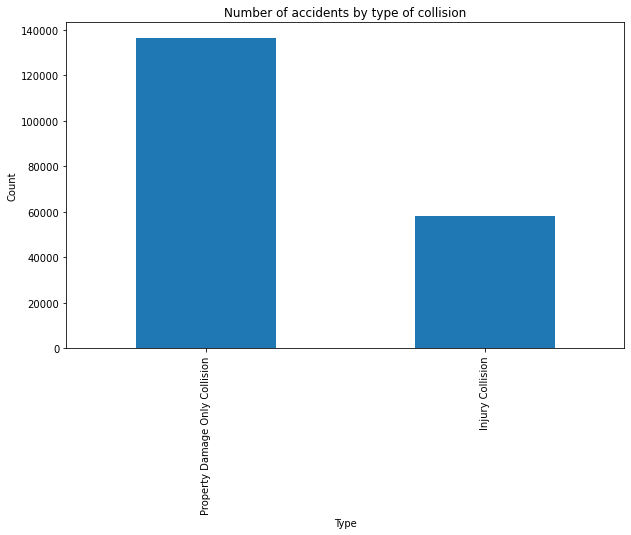

In [15]:
Severity_desc.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Type') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Number of accidents by type of collision') # add title to the plot

plt.show()

In [16]:
df_accident.groupby('SEVERITYDESC').count()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
SEVERITYDESC,,,,,,,,,,,,,,
Injury Collision,57997,58188,58188,58188,58188,58188,10397,57159,57104,57128,57098,4207,3531,58175
Property Damage Only Collision,134750,136485,136485,136485,136485,136485,19408,132630,132488,132533,132405,460,5802,136480


In [17]:
df_accident.groupby('ADDRTYPE').mean()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
ADDRTYPE,,,,,
Alley,1.898802,0.049268,0.010652,1.671105,3.434088
Block,2.388549,0.016813,0.018554,1.956802,14.215259
Intersection,2.571984,0.077670,0.048563,1.855279,13.675304


In [18]:
df_accident.groupby('ROADCOND').mean()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
ROADCOND,,,,,
Dry,2.498329,0.038053,0.035660,1.978002,14.184210
Ice,2.210918,0.020678,0.009098,1.858561,16.746898
Oil,2.093750,0.000000,0.000000,1.718750,18.875000
Other,2.159091,0.015152,0.015152,1.780303,15.893939
Sand/Mud/Dirt,1.986667,0.026667,0.026667,1.640000,18.093333
Snow/Slush,2.402390,0.025896,0.003984,1.949203,15.013944
Standing Water,1.973913,0.017391,0.026087,1.634783,18.478261
Unknown,2.042778,0.012667,0.008091,1.977451,9.301632
Wet,2.499516,0.047121,0.019737,1.953153,14.598159


In [19]:
df_accident.groupby('WEATHER').mean()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
WEATHER,,,,,
Blowing Sand/Dirt,2.250000,0.017857,0.017857,2.017857,12.196429
Clear,2.499348,0.037846,0.035857,1.976992,14.205939
Fog/Smog/Smoke,2.297012,0.042179,0.008787,1.898067,15.186292
Other,2.070913,0.028846,0.008413,1.955529,12.170673
Overcast,2.480804,0.037779,0.029119,1.966263,14.330663
Partly Cloudy,2.600000,0.000000,0.000000,2.000000,15.400000
Raining,2.512717,0.051501,0.018102,1.950219,14.659677
Severe Crosswind,2.200000,0.000000,0.000000,1.720000,16.120000
Sleet/Hail/Freezing Rain,2.433628,0.053097,0.008850,1.902655,15.884956


In [20]:
df_accident.groupby('LIGHTCOND').mean()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
LIGHTCOND,,,,,
Dark - No Street Lights,2.214053,0.042941,0.021470,1.891997,15.436565
Dark - Street Lights Off,2.346122,0.042535,0.024187,1.919099,14.942452
Dark - Street Lights On,2.484363,0.047581,0.019131,1.936504,15.087616
Dark - Unknown Lighting,1.818182,0.181818,0.090909,1.454545,18.818182
Dawn,2.210631,0.055955,0.043965,1.892486,15.439249
Daylight,2.504456,0.036827,0.035415,1.986473,13.882113
Dusk,2.527448,0.043206,0.035751,1.966960,14.020502
Other,2.106383,0.025532,0.008511,1.893617,14.017021
Unknown,2.040080,0.008610,0.006903,1.982632,9.563349


### Data visualisation

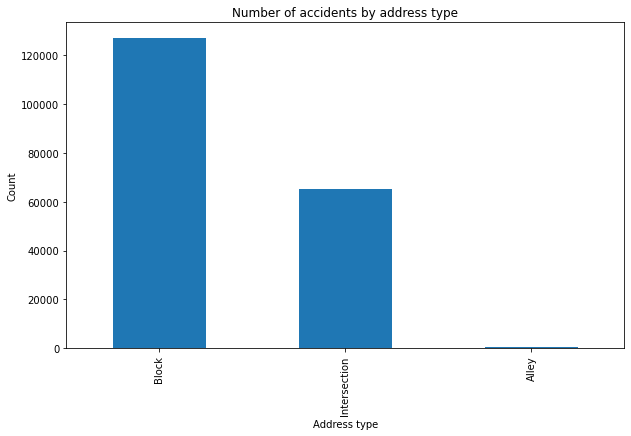

In [21]:
%matplotlib inline
Severity_ADDRTYPE = df_accident['ADDRTYPE'].value_counts()

Severity_ADDRTYPE.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Address type') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Number of accidents by address type') # add title to the plot

plt.show()

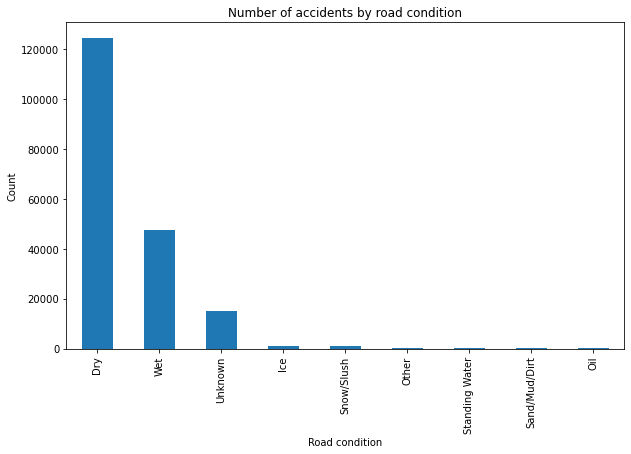

In [22]:
Severity_ROADCOND = df_accident['ROADCOND'].value_counts()

Severity_ROADCOND.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Road condition') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Number of accidents by road condition') # add title to the plot

plt.show()

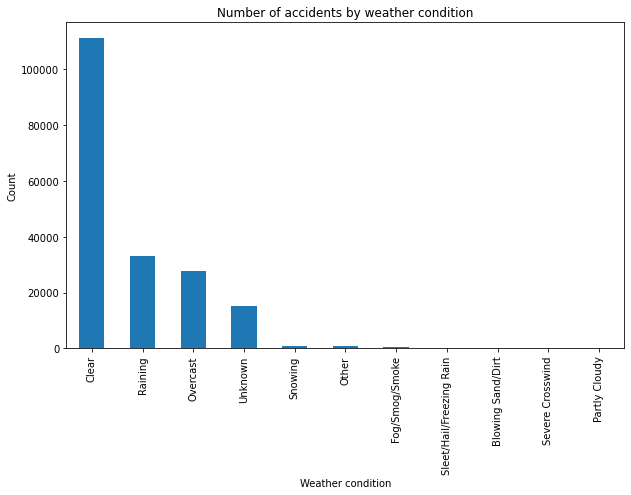

In [23]:
Severity_WEATHER = df_accident['WEATHER'].value_counts()

Severity_WEATHER.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Weather condition') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Number of accidents by weather condition') # add title to the plot

plt.show()

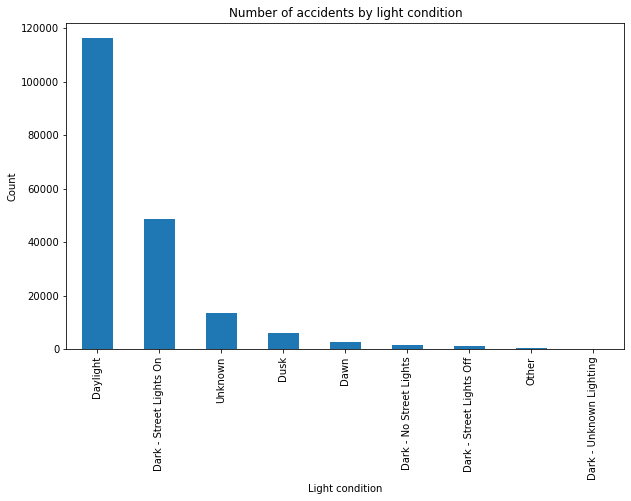

In [24]:
Severity_LIGHTCOND = df_accident['LIGHTCOND'].value_counts()

Severity_LIGHTCOND.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Light condition') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Number of accidents by light condition') # add title to the plot

plt.show()

### Data analysis

In [25]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

%matplotlib inline 
import matplotlib.pyplot as plt

In [26]:
data = pd.get_dummies(df_accident, columns =['LIGHTCOND', 'WEATHER', 'ROADCOND', 'ADDRTYPE'])
data.head()

,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,Injury Collision,2,0,0,2,11,NaN,N,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
1,Property Damage Only Collision,2,0,0,2,16,NaN,0,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0
1,Property Damage Only Collision,4,0,0,3,14,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,Property Damage Only Collision,3,0,0,3,11,NaN,N,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,Injury Collision,2,0,0,2,11,NaN,0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1


In [27]:
data.columns

Index(['SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersect

####  Logistic regression - number of bicycles/vehicles/people

In [28]:
X = np.asarray(data[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
      'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Daylight', 'WEATHER_Clear', 'WEATHER_Overcast',
       'WEATHER_Raining', 'ROADCOND_Dry', 'ROADCOND_Wet',
       'ADDRTYPE_Intersection']])
X[0:5]


array([[2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1],
       [2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0],
       [4, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0],
       [3, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0],
       [2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1]])

In [29]:
y = np.asarray(df_accident['SEVERITYDESC'])
y [0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [30]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:7]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.576075  ,
         0.82233559, -1.15340914,  2.45445634, -0.45298634, -1.33213439,
         1.76085874,  1.41129279],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783,  1.73588509,
        -1.21604855, -1.15340914, -0.4074222 ,  2.2075721 , -1.33213439,
         1.76085874, -0.70857019],
       [ 1.15576451, -0.18743029, -0.16958841,  1.7102107 , -0.576075  ,
         0.82233559, -1.15340914,  2.45445634, -0.45298634,  0.75067501,
        -0.56790473, -0.70857019],
       [ 0.41278122, -0.18743029, -0.16958841,  1.7102107 , -0.576075  ,
         0.82233559,  0.86699503, -0.4074222 , -0.45298634,  0.75067501,
        -0.56790473, -0.70857019],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.576075  ,
         0.82233559, -1.15340914, -0.4074222 ,  2.2075721 , -1.33213439,
         1.76085874,  1.41129279],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.576075  ,
         0.82233559,  

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.576075  ,
         0.82233559, -1.15340914,  2.45445634, -0.45298634, -1.33213439,
         1.76085874,  1.41129279],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783,  1.73588509,
        -1.21604855, -1.15340914, -0.4074222 ,  2.2075721 , -1.33213439,
         1.76085874, -0.70857019],
       [ 1.15576451, -0.18743029, -0.16958841,  1.7102107 , -0.576075  ,
         0.82233559, -1.15340914,  2.45445634, -0.45298634,  0.75067501,
        -0.56790473, -0.70857019],
       [ 0.41278122, -0.18743029, -0.16958841,  1.7102107 , -0.576075  ,
         0.82233559,  0.86699503, -0.4074222 , -0.45298634,  0.75067501,
        -0.56790473, -0.70857019],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.576075  ,
         0.82233559, -1.15340914, -0.4074222 ,  2.2075721 , -1.33213439,
         1.76085874,  1.41129279]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 12) (155738,)
Test set: (38935, 12) (38935,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
yhat = LR.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [35]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.1957725 , 0.8042275 ],
       [0.34137232, 0.65862768],
       [0.22165322, 0.77834678],
       ...,
       [0.30702696, 0.69297304],
       [0.24072405, 0.75927595],
       [0.13271895, 0.86728105]])

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhat)
print(confusion_matrix)

[[ 2644  9066]
 [  730 26495]]


In [37]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7484011814562733

In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5310876187133347

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))


                                precision    recall  f1-score   support

              Injury Collision       0.78      0.23      0.35     11710
Property Damage Only Collision       0.75      0.97      0.84     27225

                     micro avg       0.75      0.75      0.75     38935
                     macro avg       0.76      0.60      0.60     38935
                  weighted avg       0.76      0.75      0.70     38935



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        


In [41]:
cnf_matrix = metrics.confusion_matrix(y_test, yhat)
cnf_matrix


NameError: name 'metrics' is not defined

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


##### DT

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#X = df_accident[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','LIGHTCOND_Dark - Street Lights On''LIGHTCOND_Daylight', 'WEATHER_Clear', 'WEATHER_Overcast','WEATHER_Raining', 'ROADCOND_Dry', 'ROADCOND_Wet','ADDRTYPE_Intersection']].values
#X[0:5]

In [ ]:
y = df_accident['SEVERITYDESC']
y[0:5]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_trainset.shape)
print(y_trainset.shape)

In [ ]:
print(X_testset.shape)
print(y_testset.shape)

In [ ]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters

In [ ]:
decisionTree.fit(X_trainset,y_trainset)

In [ ]:
predTree = decisionTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

In [ ]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
<---
dot_data = StringIO()
filename = "decisionTree.png"
featureNames = df_accident.columns[0:4]
targetNames = df_accident['SEVERITYDESC'].unique().tolist()
out=tree.export_graphviz(decisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')
--->

### KNN

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 